<a href="https://colab.research.google.com/github/259mit/TradeSignalSentiment/blob/main/Notebooks/TradeSignalSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Trade Signal Sentiment Dection Project
## Authors: Mithesh Ramachandran, Vidhi Kapoor, Kartikay Laddha

## Section 1: Articles

### Dependencies

In [ ]:
!pip install newsapi
!pip install newsapi-python
!pip install newspaper3k
!pip install vaderSentiment
!pip install streamlit
!pip install pyngrok
!pip install pandas_datareader
!pip install yfinance
!pip install fuzzywuzzy

     |████████████████████████████████| 211 kB 7.3 MB/s 
     |████████████████████████████████| 81 kB 7.6 MB/s 
     |████████████████████████████████| 7.4 MB 22.7 MB/s 
     |████████████████████████████████| 87 kB 4.9 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=0faf646ec24a5566df9f3791e16a98422e623844c3d45691e3bc73d7ffd65b27
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=11b9cfcfe6d7b203cee6f42c6b95bc0927a3ee533cd14fd729f3d0b3c18b8bf2
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=683dc564eb2c25edbfbd3d48ab6cfd1c523ee7aa42ae766c67bbcbfc53ff4237
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

     |████████████████████████████████| 745 kB 9.7 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=6468e18d5865db1dec798af44b5b4a158e22d032515005914ee0066eccac3354
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
     |████████████████████████████████| 6.3 MB 11.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


### Libraries

In [ ]:
import numpy as np
import datetime 
import newsapi
import matplotlib.pyplot as plt
#import streamlit as st
import datetime as dt
import pandas as pd
from newsapi import NewsApiClient
import time 
import datetime as dt
import requests 
import newspaper
from newspaper import Article
from textblob import Word
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as si
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from textblob import TextBlob, Word
from pyngrok import ngrok
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import yfinance as yf
from fuzzywuzzy import process
import requests
import plotly.graph_objects as go
from plotly import tools
import plotly.offline as py
import plotly.express as px

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Article Report Main Function

In [ ]:
def article_report(keyword):
    startt = time.perf_counter()
    stop=stopwords.words('english') 
    newsapi = NewsApiClient(api_key='9cd029b37ae74ddca59ac1a9fd295fb4')
    tod = datetime.datetime.now()
    d = datetime.timedelta(days = 29)
    a = tod - d
    # /v2/top-headlines
    top_headlines = newsapi.get_top_headlines(q=keyword,
                                              sources='google-news-in,the-hindu')
    all_articles = newsapi.get_everything(q=keyword,
                                      sources='google-news-in,the-hindu',
                                      domains='news.google.com,thehindu.com',
                                      from_param=str(a)[:10],
                                      to=str(tod)[:10],
                                      language='en',
                                      sort_by='relevancy')
    articles = all_articles['articles']
    df = pd.DataFrame(articles)
    z = df
    z.publishedAt = pd.to_datetime(z.publishedAt)
    t=z
    t['polarity']=""
    t['subjectivity']=""
    t['vader_sentiment']=""
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\n)|(—)|(\")|(\()|(\))|(\[)|(\])")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    t['Unnamed: 0'] = list(t.index)
    t= t[['Unnamed: 0','source', 'author', 'title', 'description', 'url', 'urlToImage',
           'publishedAt', 'content', 'polarity', 'subjectivity', 'vader_sentiment']]
    for i in t['Unnamed: 0']:
        if t.iloc[i,0]>0: # After every couple of pages, I encountered an error, hence keep changing this number to read all urls
            g=""
            p=""
            article=Article(t.loc[i-1,'url'])  ##using Article package to extract text from web pages
            article.download()
            time.sleep(1) 
            article.parse()
            g=article.text
            g=REPLACE_NO_SPACE.sub("",g) # removing non symbols and stopwords
            g= re.sub('[0-9]+', '', g)
            g = ' '.join(g for g in g.split() if g not in stop)
            t.loc[i-1,'polarity']=TextBlob(g).sentiment[0]
            t.loc[i-1,'subjectivity']=TextBlob(g).sentiment[1]
            analyser=si()
            p=analyser.polarity_scores(g)
            t.loc[i-1,'vader_sentiment']=list(p.values())[3]
            #print(i)
    t.drop(df.tail(1).index,inplace=True)
    t['publishedAt'] = t['publishedAt'].dt.tz_localize(None)
    scores = t
    scores['Date'] = scores['publishedAt'].dt.date
    s=scores[['Date','polarity','subjectivity','vader_sentiment']]
    min_s=s.groupby('Date',as_index=False).min()
    min_s.columns=['Date','polarity_min','subjectivity_min','vader_min']
    max_s=s.groupby('Date',as_index=False).max()
    max_s.columns=['Date','polarity_max','subjectivity_max','vader_max']
    comb_s=pd.merge(max_s,min_s,on='Date')
    comb_s['extreme_score']=comb_s['vader_max']+comb_s['vader_min']
    scores=comb_s[['Date','extreme_score']]
    ## get csv
    sentimentdata = t
    sentimentdata['Date'] = sentimentdata['publishedAt'].dt.date
    sentimentdata=sentimentdata[['Date','polarity','subjectivity','vader_sentiment']]
    plt.style.use("fivethirtyeight")
    %matplotlib inline
    chart1 = sentimentdata[['Date', 'polarity']]
    chart1.plot.bar(x='Date')
    chart2 = sentimentdata[['Date', 'subjectivity']]
    chart2.plot.bar(x='Date',color='purple')
    chart3 = sentimentdata[['Date', 'vader_sentiment']]
    chart3.plot.bar(x='Date',color='green')
    endt = time.perf_counter()
    print('Time elapsed: ',endt-startt, ' seconds')
    return sentimentdata

## Article report India Main function

In [ ]:
def article_report_india(keyword, ticker):
    startt = time.perf_counter()
    stop=stopwords.words('english') 
    newsapi = NewsApiClient(api_key='9cd029b37ae74ddca59ac1a9fd295fb4')
    tod = datetime.datetime.now()
    d = datetime.timedelta(days = 29)
    a = tod - d
    # /v2/top-headlines
    top_headlines = newsapi.get_top_headlines(q=keyword,
                                          sources='google-news-in,the-hindu,the-times-of-india')
    all_articles = newsapi.get_everything(q=keyword,
                                      sources='google-news-in,the-hindu,the-times-of-india',
                                      domains='news.google.com,thehindu.com,timesofindia.indiatimes.com',
                                      from_param=str(a)[:10],
                                      to=str(tod)[:10],
                                      language='en',
                                      sort_by='relevancy')
    articles = top_headlines['articles']
    df = pd.DataFrame(articles)
    z = df
    z.publishedAt = pd.to_datetime(z.publishedAt)
    t=z
    t['polarity']=""
    t['subjectivity']=""
    t['vader_sentiment']=""
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\n)|(—)|(\")|(\()|(\))|(\[)|(\])")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    t['Unnamed: 0'] = list(t.index)
    t= t[['Unnamed: 0','source', 'author', 'title', 'description', 'url', 'urlToImage',
           'publishedAt', 'content', 'polarity', 'subjectivity', 'vader_sentiment']]
    for i in t['Unnamed: 0']:
        if t.iloc[i,0]>0: # After every couple of pages, I encountered an error, hence keep changing this number to read all urls
            g=""
            p=""
            article=Article(t.loc[i-1,'url'])  ##using Article package to extract text from web pages
            article.download()
            time.sleep(1) 
            article.parse()
            g=article.text
            g=REPLACE_NO_SPACE.sub("",g) # removing non symbols and stopwords
            g= re.sub('[0-9]+', '', g)
            g = ' '.join(g for g in g.split() if g not in stop)
            t.loc[i-1,'polarity']=TextBlob(g).sentiment[0]
            t.loc[i-1,'subjectivity']=TextBlob(g).sentiment[1]
            analyser=si()
            p=analyser.polarity_scores(g)
            t.loc[i-1,'vader_sentiment']=list(p.values())[3]
            #print(i)
    t.drop(df.tail(1).index,inplace=True)
    t['publishedAt'] = t['publishedAt'].dt.tz_localize(None)
    scores = t
    scores['Date'] = scores['publishedAt'].dt.date
    s=scores[['Date','polarity','subjectivity','vader_sentiment']]
    min_s=s.groupby('Date',as_index=False).min()
    min_s.columns=['Date','polarity_min','subjectivity_min','vader_min']
    max_s=s.groupby('Date',as_index=False).max()
    max_s.columns=['Date','polarity_max','subjectivity_max','vader_max']
    comb_s=pd.merge(max_s,min_s,on='Date')
    comb_s['extreme_score']=comb_s['vader_max']+comb_s['vader_min']
    scores=comb_s[['Date','extreme_score']]
    scores=pd.DataFrame(scores)
    stock = ticker
    start = str(a)[:10]
    end = str(tod)[:10]
    df = yf.download(stock,start,end)
    df = pd.DataFrame(df)
    df.reset_index(inplace=True)
    df['returns']=df.Close.pct_change()
    df['2_SMA'] = df['Close'].rolling(window=2).mean()
    df['5_SMA'] = df['Close'].rolling(window=5).mean()
    df = df[df['5_SMA'].notna()]
    df['Date']=pd.to_datetime(df['Date'])
    scores['Date'] = pd.to_datetime(scores['Date'])
    data=pd.merge(df,scores,on='Date',how='left')
    data=data.fillna(0)
    lt=data.extreme_score.expanding().mean()  #long threshold
    print('long th: '+str(lt))
    sht=data.extreme_score.expanding().mean() #Short threshold
    print('short th: '+str(sht))
    data['signal']=np.where(data.extreme_score>lt,1,np.where(data.extreme_score<sht,-1,0))
    data['position']=data['signal'].shift(1)
    data['strategy_returns']=data.returns*data.position
    data = data.fillna(0)
    data[['returns','strategy_returns']].cumsum().plot(grid=True,figsize=(14,9))
    data['excess_returns']=data.strategy_returns-(0.04/252)  # Assuming 4% risk free rate
    # Annualised Sharpe Ratio for strategy
    Sharpe_ratio=np.sqrt(252)*data.excess_returns.mean()/data.strategy_returns.std()
    print('Annualised Sharpe Ratio for strategy : ',Sharpe_ratio)
    print(data.strategy_returns.sum())
    print(data.returns.sum())
    data['excess_returns1']=data.returns-(0.04/252)
    # Annualised Sharpe Ratio for Buy and Hold
    Sharpe_ratio1=np.sqrt(252)*data.excess_returns1.mean()/data.returns.std()
    print('Annualised Sharpe Ratio for Buy and Hold', Sharpe_ratio1)
    df = data
    Trade_Buy=[]
    Trade_Sell=[]
    for i in range(len(df)-1):
        if ((df['2_SMA'].values[i] < df['5_SMA'].values[i]) & (df['2_SMA'].values[i+1] > df['5_SMA'].values[i+1])):
            print("Trade Call for {row} is Buy.".format(row=df['Date'].iloc[i]))
            Trade_Buy.append(i)
        elif ((df['2_SMA'].values[i] > df['5_SMA'].values[i]) & (df['2_SMA'].values[i+1] < df['5_SMA'].values[i+1])):
            print("Trade Call for {row} is Sell.".format(row=df['Date'].iloc[i]))
            Trade_Sell.append(i)


    vader_Buy=[]
    vader_Sell=[]
    for i in range(len(scores)):
        if scores['extreme_score'].values[i] > 0.5:
            print("Trade Call for {row} is Buy.".format(row=scores['Date'].iloc[i]))
            vader_Buy.append(scores['Date'].iloc[i])
        elif scores['extreme_score'].values[i] < -0.20:
            print("Trade Call for {row} is Sell.".format(row=scores['Date'].iloc[i]))
            vader_Sell.append(scores['Date'].iloc[i])

    vader_buy = []
    for i in range(len(df)):
        if df['Date'].iloc[i] in vader_Buy:
            vader_buy.append(i)
            
    vader_sell = []
    for i in range(len(df)):
        if df['Date'].iloc[i] in vader_Sell:
            vader_sell.append(i)   

    final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
    final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

    sentimentdata = t
    sentimentdata['Date'] = sentimentdata['publishedAt'].dt.date
    sentimentdata=sentimentdata[['Date','polarity','subjectivity','vader_sentiment']]


    plt.style.use("fivethirtyeight")
    %matplotlib inline

    plt.figure(figsize=(20, 10),dpi=80)
    plt.plot(df.index, df['Close'])
    plt.plot(df.index, df['2_SMA'],'-^', markevery=Trade_Buy, ms=15, color='green')
    plt.plot(df.index, df['5_SMA'],'-v', markevery=Trade_Sell, ms=15, color='red')
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('Price in Rupees', fontsize = 14)
    plt.xticks(rotation='60',fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Trade Calls - Moving Averages Crossover', fontsize = 16)
    plt.legend(['Close','2_SMA','5_SMA'])
    plt.grid()
    plt.show()

    plt.figure(figsize=(20, 10),dpi=80)
    plt.plot(df['Date'], df['2_SMA'], color='blue')
    plt.plot(df['Date'], df['5_SMA'], color='orange')
    plt.plot(df['Date'], df['Close'],'-^', markevery=final_buy, ms=15, color='green')
    plt.plot(df['Date'], df['Close'],'-v', markevery=final_sell, ms=15, color='red')
    plt.plot(df['Date'], df['Close'])
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('Price in Dollars', fontsize = 14)
    plt.xticks(rotation='60',fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Trade Calls - MERGED', fontsize = 16)
    plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
    plt.grid()
    plt.show()

    chart1 = sentimentdata[['Date', 'polarity']]
    chart1.plot.bar(x='Date')
    chart2 = sentimentdata[['Date', 'subjectivity']]
    chart2.plot.bar(x='Date',color='purple')
    chart3 = sentimentdata[['Date', 'vader_sentiment']]
    chart3.plot.bar(x='Date',color='green')


    endt = time.perf_counter()
    print('Time elapsed: ',endt-startt, ' seconds')
    return df, scores, Trade_Buy, Trade_Sell, final_buy, final_sell, sentimentdata

[*********************100%***********************]  1 of 1 completed
long th: 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: extreme_score, dtype: float64
short th: 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: extreme_score, dtype: float64
Annualised Sharpe Ratio for strategy :  -inf
0.0
-0.013019068343664286
Annualised Sharpe Ratio for Buy and Hold -1.1907880492458551
Trade Call for 2021-12-01 00:00:00 is Buy.
Trade Call for 2021-12-03 00:00:00 is Sell.
Trade Call for 2021-12-07 00:00:00 is Buy.
Trade Call for 2021-07-22 00:00:00 is Buy.
Trade Call for 2021-12-12 00:00:00 is Sell.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning:

divide by zero encountered in double_scalars



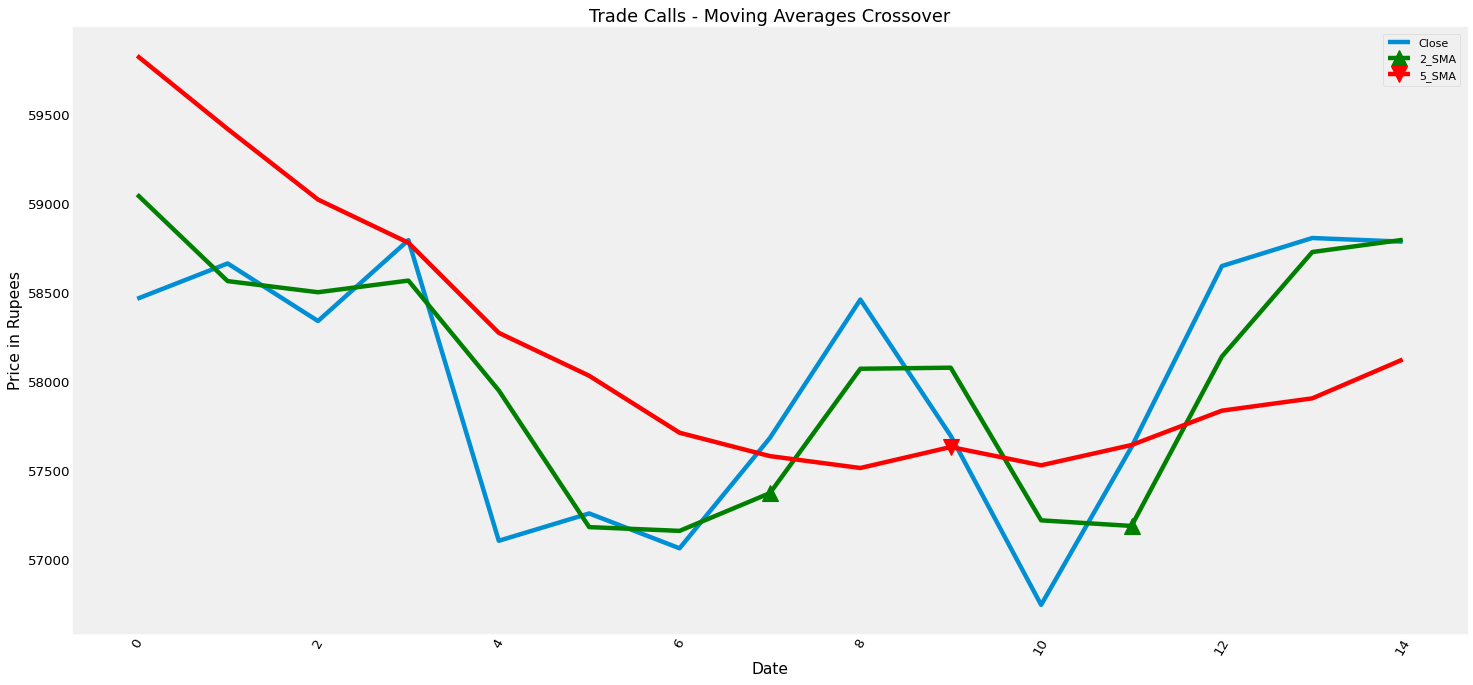

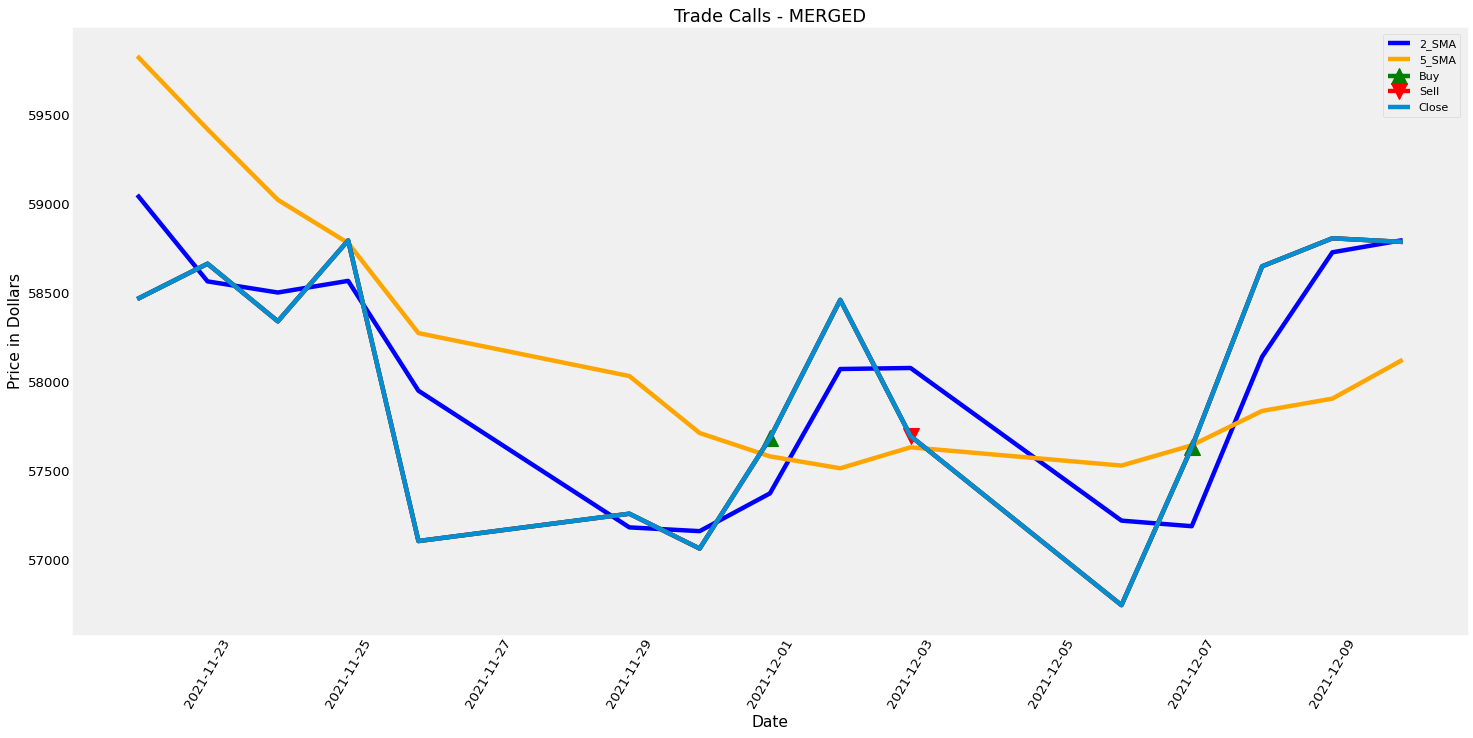

Time elapsed:  24.640022531999875  seconds


NameError: ignored

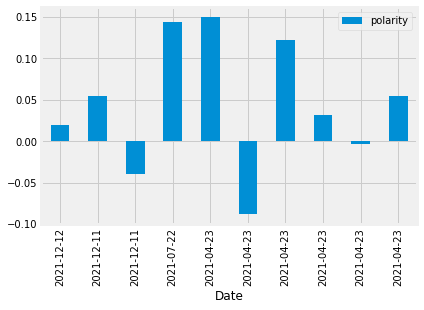

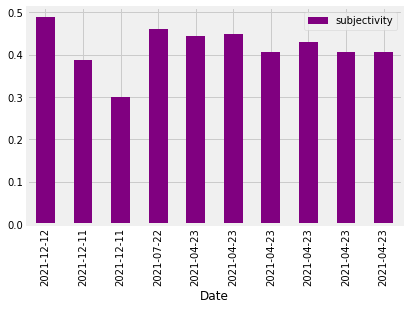

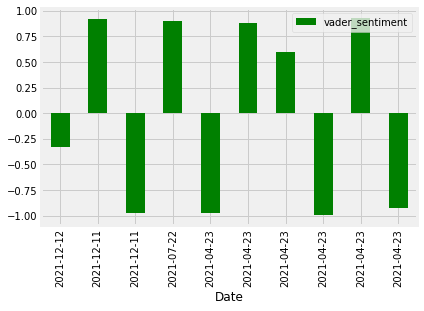

In [ ]:
df, scores, Trade_Buy, Trade_Sell, final_buy, final_sell, sentimentdata = article_report_india('india' , '^BSESN')
data1

In [ ]:
df['Close'][Trade_Buy]

4    49858.238281
9    49008.500000
Name: Close, dtype: float64

In [ ]:
Trade_Sell

[7]

In [ ]:
final_buy

[9, 3, 4]

In [ ]:
final_sell

[7]

## Article report NYSE Main Function

In [ ]:
def getCompany(text):
    r = requests.get('https://api.iextrading.com/1.0/ref-data/symbols')
    stockList = r.json()
    return process.extractOne(text, stockList)[0]

def article_report_nyse(keyword):
    startt = time.perf_counter()
    stop=stopwords.words('english') 
    newsapi = NewsApiClient(api_key='9cd029b37ae74ddca59ac1a9fd295fb4')
    tod = datetime.datetime.now()
    d = datetime.timedelta(days = 29)
    a = tod - d
    # /v2/top-headlines
    top_headlines = newsapi.get_top_headlines(q=keyword,
                                              sources='google-news-in,the-hindu')
    all_articles = newsapi.get_everything(q=keyword,
                                      sources='google-news-in,the-hindu',
                                      domains='news.google.com,thehindu.com',
                                      from_param=str(a)[:10],
                                      to=str(tod)[:10],
                                      language='en',
                                      sort_by='relevancy')
    articles = all_articles['articles']
    df = pd.DataFrame(articles)
    z = df
    z.publishedAt = pd.to_datetime(z.publishedAt)
    t=z
    t['polarity']=""
    t['subjectivity']=""
    t['vader_sentiment']=""
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\n)|(—)|(\")|(\()|(\))|(\[)|(\])")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    t['Unnamed: 0'] = list(t.index)
    t= t[['Unnamed: 0','source', 'author', 'title', 'description', 'url', 'urlToImage',
           'publishedAt', 'content', 'polarity', 'subjectivity', 'vader_sentiment']]
    for i in t['Unnamed: 0']:
        if t.iloc[i,0]>0: # After every couple of pages, I encountered an error, hence keep changing this number to read all urls
            g=""
            p=""
            article=Article(t.loc[i-1,'url'])  ##using Article package to extract text from web pages
            article.download()
            time.sleep(1) 
            article.parse()
            g=article.text
            g=REPLACE_NO_SPACE.sub("",g) # removing non symbols and stopwords
            g= re.sub('[0-9]+', '', g)
            g = ' '.join(g for g in g.split() if g not in stop)
            t.loc[i-1,'polarity']=TextBlob(g).sentiment[0]
            t.loc[i-1,'subjectivity']=TextBlob(g).sentiment[1]
            analyser=si()
            p=analyser.polarity_scores(g)
            t.loc[i-1,'vader_sentiment']=list(p.values())[3]
            #print(i)
    t.drop(df.tail(1).index,inplace=True)
    t['publishedAt'] = t['publishedAt'].dt.tz_localize(None)
    scores = t
    scores['Date'] = scores['publishedAt'].dt.date
    s=scores[['Date','polarity','subjectivity','vader_sentiment']]
    min_s=s.groupby('Date',as_index=False).min()
    min_s.columns=['Date','polarity_min','subjectivity_min','vader_min']
    max_s=s.groupby('Date',as_index=False).max()
    max_s.columns=['Date','polarity_max','subjectivity_max','vader_max']
    comb_s=pd.merge(max_s,min_s,on='Date')
    comb_s['extreme_score']=comb_s['vader_max']+comb_s['vader_min']
    scores=comb_s[['Date','extreme_score']]
    scores=pd.DataFrame(scores)
    k = getCompany('sensex')
    stock = k['symbol']
    start = str(a)[:10]
    end = str(tod)[:10]
    df = web.DataReader(stock, 'yahoo',start,end)
    df = pd.DataFrame(df)
    df.reset_index(inplace=True)
    df['returns']=df.Close.pct_change()
    df['Date']=df['Date'].astype('object')
    data=pd.merge(df,scores,on='Date',how='left')
    data=data.fillna(method='ffill')
    scores
    lt=data.extreme_score.expanding().mean()  #long threshold
    st=data.extreme_score.expanding().mean() #Short threshold
    data['signal']=np.where(data.extreme_score>lt,1,np.where(data.extreme_score<st,-1,0))
    data['position']=data['signal'].shift(1)
    data['strategy_returns']=data.returns*data.position
    data[['returns','strategy_returns']].cumsum().plot(grid=True,figsize=(14,9))
    data['excess_returns']=data.strategy_returns-(0.04/252)  # Assuming 4% risk free rate
    # Annualised Sharpe Ratio for strategy
    Sharpe_ratio=np.sqrt(252)*data.excess_returns.mean()/data.strategy_returns.std()
    print('Annualised Sharpe Ratio for strategy : ',Sharpe_ratio)
    print(data.strategy_returns.sum())
    print(data.returns.sum())
    data['excess_returns1']=data.returns-(0.04/252)
    # Annualised Sharpe Ratio for Buy and Hold
    Sharpe_ratio1=np.sqrt(252)*data.excess_returns1.mean()/data.returns.std()
    print('Annualised Sharpe Ratio for Buy and Hold', Sharpe_ratio1)
    sentimentdata = t
    sentimentdata['Date'] = sentimentdata['publishedAt'].dt.date
    sentimentdata=sentimentdata[['Date','polarity','subjectivity','vader_sentiment']]
    plt.style.use("fivethirtyeight")
    %matplotlib inline
    chart1 = sentimentdata[['Date', 'polarity']]
    chart1.plot.bar(x='Date')
    chart2 = sentimentdata[['Date', 'subjectivity']]
    chart2.plot.bar(x='Date',color='purple')
    chart3 = sentimentdata[['Date', 'vader_sentiment']]
    chart3.plot.bar(x='Date',color='green')
    endt = time.perf_counter()
    print('Time elapsed: ',endt-startt, ' seconds')
    return sentimentdata

## Main function call

Time elapsed:  31.528675816999993  seconds


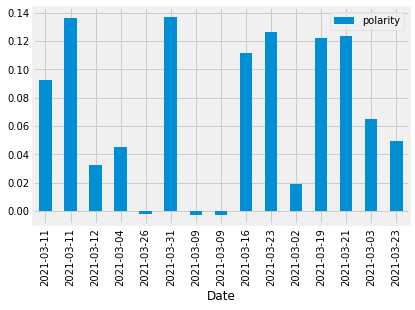

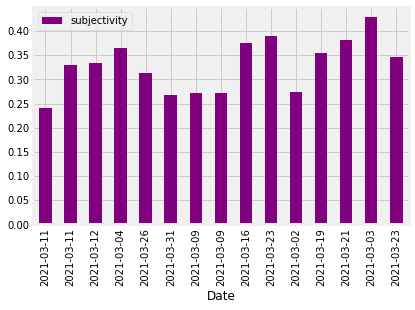

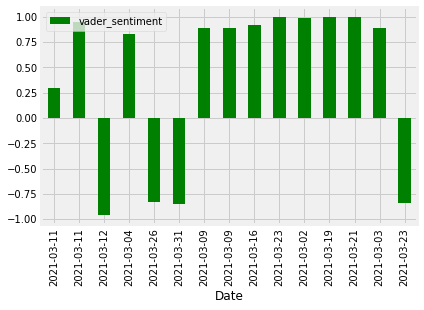

In [ ]:
samsung = article_report('samsung')

Time elapsed:  37.82299761599998  seconds


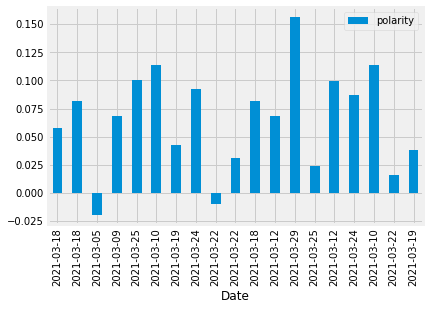

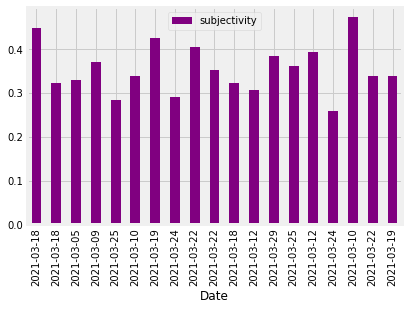

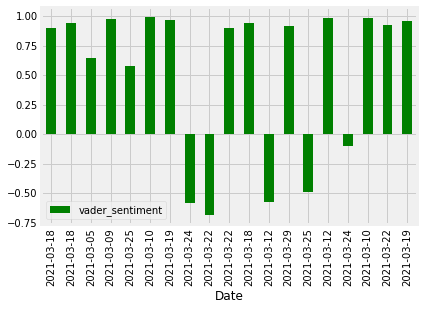

In [ ]:
sensex = article_report('sensex')

In [ ]:
%%writefile app.py
import numpy as np
import streamlit as st
import datetime 
import newsapi
import matplotlib.pyplot as plt
import datetime as dt
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import pandas as pd
from newsapi import NewsApiClient
import time 
import datetime as dt
import requests 
import newspaper
from newspaper import Article
from textblob import Word
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as si
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from textblob import TextBlob, Word
from pyngrok import ngrok
#from pandas_datareader import data as web
#from fuzzywuzzy import process
import requests
from pandas_datareader import data as web
import fix_yahoo_finance as yf

def article_report(keyword):
    startt = time.perf_counter()
    stop=stopwords.words('english') 
    newsapi = NewsApiClient(api_key='9cd029b37ae74ddca59ac1a9fd295fb4')
    tod = datetime.datetime.now()
    d = datetime.timedelta(days = 29)
    a = tod - d
    # /v2/top-headlines
    top_headlines = newsapi.get_top_headlines(q=keyword,
                                              sources='google-news-in,the-hindu')
    all_articles = newsapi.get_everything(q=keyword,
                                      sources='google-news-in,the-hindu',
                                      domains='news.google.com,thehindu.com',
                                      from_param=str(a)[:10],
                                      to=str(tod)[:10],
                                      language='en',
                                      sort_by='relevancy')
    articles = all_articles['articles']
    df = pd.DataFrame(articles)
    z = df
    z.publishedAt = pd.to_datetime(z.publishedAt)
    t=z
    t['polarity']=""
    t['subjectivity']=""
    t['vader_sentiment']=""
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\n)|(—)|(\")|(\()|(\))|(\[)|(\])")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    t['Unnamed: 0'] = list(t.index)
    t= t[['Unnamed: 0','source', 'author', 'title', 'description', 'url', 'urlToImage',
           'publishedAt', 'content', 'polarity', 'subjectivity', 'vader_sentiment']]
    for i in t['Unnamed: 0']:
        if t.iloc[i,0]>0: # After every couple of pages, I encountered an error, hence keep changing this number to read all urls
            g=""
            p=""
            article=Article(t.loc[i-1,'url'])  ##using Article package to extract text from web pages
            article.download()
            time.sleep(1) 
            article.parse()
            g=article.text
            g=REPLACE_NO_SPACE.sub("",g) # removing non symbols and stopwords
            g= re.sub('[0-9]+', '', g)
            g = ' '.join(g for g in g.split() if g not in stop)
            t.loc[i-1,'polarity']=TextBlob(g).sentiment[0]
            t.loc[i-1,'subjectivity']=TextBlob(g).sentiment[1]
            analyser=si()
            p=analyser.polarity_scores(g)
            t.loc[i-1,'vader_sentiment']=list(p.values())[3]
            #print(i)
    t.drop(df.tail(1).index,inplace=True)
    t['publishedAt'] = t['publishedAt'].dt.tz_localize(None)
    scores = t
    scores['Date'] = scores['publishedAt'].dt.date
    s=scores[['Date','polarity','subjectivity','vader_sentiment']]
    min_s=s.groupby('Date',as_index=False).min()
    min_s.columns=['Date','polarity_min','subjectivity_min','vader_min']
    max_s=s.groupby('Date',as_index=False).max()
    max_s.columns=['Date','polarity_max','subjectivity_max','vader_max']
    comb_s=pd.merge(max_s,min_s,on='Date')
    comb_s['extreme_score']=comb_s['vader_max']+comb_s['vader_min']
    scores=comb_s[['Date','extreme_score']]
    ## get csv
    sentimentdata = t
    sentimentdata['Date'] = sentimentdata['publishedAt'].dt.date
    sentimentdata=sentimentdata[['Date','polarity','subjectivity','vader_sentiment']]
    plt.style.use("fivethirtyeight")
    #%matplotlib inline
    #chart1 = sentimentdata[['Date', 'polarity']]
    #chart1.plot.bar(x='Date')
    #chart2 = sentimentdata[['Date', 'subjectivity']]
    #chart2.plot.bar(x='Date',color='purple')
    #chart3 = sentimentdata[['Date', 'vader_sentiment']]
    #chart3.plot.bar(x='Date',color='green')
    endt = time.perf_counter()
    print('Time elapsed: ',endt-startt, ' seconds')
    return sentimentdata

st.title("Trade Signal Indicator For Indian Stock Market")

# Header
st.header("Trade Signal Indicator For Indian Stock Market") 
  
# Subheader
st.subheader("A project by: Mithesh R, Vidhi K, Kartikay L")

keyword = st.text_input("Enter Your Keyword", "Type Here ...")
#ticker = st.text_input("Enter The Stock Ticker", "Type Here ...")

sentimentdata = article_report(keyword)

st.bar_chart(sentimentdata['polarity'])


st.bar_chart(sentimentdata['subjectivity'])

st.bar_chart(sentimentdata['vader_sentiment'])


Overwriting app.py


## Deploy

In [ ]:
%%writefile app.py
import numpy as np
import streamlit as st
import datetime 
import newsapi
import matplotlib.pyplot as plt
import datetime as dt
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import pandas as pd
from newsapi import NewsApiClient
import time 
import datetime as dt
import requests 
import newspaper
from newspaper import Article
from textblob import Word
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as si
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from textblob import TextBlob, Word
from pyngrok import ngrok
from fuzzywuzzy import process
import requests
from pandas_datareader import data as web
import yfinance as yf
import plotly.graph_objects as go
from plotly import tools
import plotly.offline as py
import plotly.express as px

def getCompany(text):
    r = requests.get('https://api.iextrading.com/1.0/ref-data/symbols')
    stockList = r.json()
    return process.extractOne(text, stockList)[0]

def article_report_nasdaq(keyword):
    startt = time.perf_counter()
    stop=stopwords.words('english') 
    newsapi = NewsApiClient(api_key='9cd029b37ae74ddca59ac1a9fd295fb4')
    tod = datetime.datetime.now()
    d = datetime.timedelta(days = 29)
    a = tod - d
    # /v2/top-headlines
    top_headlines = newsapi.get_top_headlines(q=keyword,
                                              sources='google-news-in,cbs-news,cnn')
    all_articles = newsapi.get_everything(q=keyword,
                                      sources='google-news-in,cbs-news,cnn',
                                      domains='news.google.com,cbsnews.com,us.cnn.com',
                                      from_param=str(a)[:10],
                                      to=str(tod)[:10],
                                      language='en',
                                      sort_by='relevancy')
    articles = all_articles['articles']
    df = pd.DataFrame(articles)
    z = df
    z.publishedAt = pd.to_datetime(z.publishedAt)
    t=z
    t['polarity']=""
    t['subjectivity']=""
    t['vader_sentiment']=""
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\n)|(—)|(\")|(\()|(\))|(\[)|(\])")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    t['Unnamed: 0'] = list(t.index)
    t= t[['Unnamed: 0','source', 'author', 'title', 'description', 'url', 'urlToImage',
           'publishedAt', 'content', 'polarity', 'subjectivity', 'vader_sentiment']]
    for i in t['Unnamed: 0']:
        if t.iloc[i,0]>0: # After every couple of pages, I encountered an error, hence keep changing this number to read all urls
            g=""
            p=""
            article=Article(t.loc[i-1,'url'])  ##using Article package to extract text from web pages
            article.download()
            time.sleep(1) 
            article.parse()
            g=article.text
            g=REPLACE_NO_SPACE.sub("",g) # removing non symbols and stopwords
            g= re.sub('[0-9]+', '', g)
            g = ' '.join(g for g in g.split() if g not in stop)
            t.loc[i-1,'polarity']=TextBlob(g).sentiment[0]
            t.loc[i-1,'subjectivity']=TextBlob(g).sentiment[1]
            analyser=si()
            p=analyser.polarity_scores(g)
            t.loc[i-1,'vader_sentiment']=list(p.values())[3]
            #print(i)
    t.drop(df.tail(1).index,inplace=True)
    t['publishedAt'] = t['publishedAt'].dt.tz_localize(None)
    scores = t
    scores['Date'] = scores['publishedAt'].dt.date
    s=scores[['Date','polarity','subjectivity','vader_sentiment']]
    min_s=s.groupby('Date',as_index=False).min()
    min_s.columns=['Date','polarity_min','subjectivity_min','vader_min']
    max_s=s.groupby('Date',as_index=False).max()
    max_s.columns=['Date','polarity_max','subjectivity_max','vader_max']
    comb_s=pd.merge(max_s,min_s,on='Date')
    comb_s['extreme_score']=comb_s['vader_max']+comb_s['vader_min']
    scores=comb_s[['Date','extreme_score']]
    scores=pd.DataFrame(scores)
    k = getCompany('sensex')
    stock = k['symbol']
    start = str(a)[:10]
    end = str(tod)[:10]
    df = yf.download(stock,start,end)
    df = pd.DataFrame(df)
    df['2_SMA'] = df['Close'].rolling(window=2).mean()
    df['5_SMA'] = df['Close'].rolling(window=5).mean()
    df = df[df['5_SMA'].notna()]
    df.reset_index(inplace=True)
    df['returns']=df.Close.pct_change()
    df['Date']=df['Date'].astype('object')
    df['Date']=pd.to_datetime(df['Date'])
    scores['Date'] = pd.to_datetime(scores['Date'])
    data=pd.merge(df,scores,on='Date',how='left')
    data=data.fillna(0)
    data=data.fillna(method='ffill')
    lt=data.extreme_score.expanding().mean()  #long threshold
    st=data.extreme_score.expanding().mean() #Short threshold
    data['signal']=np.where(data.extreme_score>lt,1,np.where(data.extreme_score<st,-1,0))
    data['position']=data['signal'].shift(1)
    data['strategy_returns']=data.returns*data.position
    data=data.fillna(0)
    #data[['returns','strategy_returns']].cumsum().plot(grid=True,figsize=(14,9))
    data['excess_returns']=data.strategy_returns-(0.04/252)  # Assuming 4% risk free rate
    # Annualised Sharpe Ratio for strategy
    Sharpe_ratio=np.sqrt(252)*data.excess_returns.mean()/data.strategy_returns.std()
    #print('Annualised Sharpe Ratio for strategy : ',Sharpe_ratio)
    #print(data.strategy_returns.sum())
    #print(data.returns.sum())
    data['excess_returns1']=data.returns-(0.04/252)
    # Annualised Sharpe Ratio for Benchmark
    data['excess_returns_benchmark']=data.returns-(0.04/252) # Assuming 4% risk free rate
    Sharpe_ratio_benchmark=np.sqrt(252)*data.excess_returns_benchmark.mean()/data.returns.std()
    #print('Annualised Sharpe Ratio for Buy and Hold', Sharpe_ratio1)

    df = data
    Trade_Buy=[]
    Trade_Sell=[]
    for i in range(len(df)-1):
        if ((df['2_SMA'].values[i] < df['5_SMA'].values[i]) & (df['2_SMA'].values[i+1] > df['5_SMA'].values[i+1])):
            print("Trade Call for {row} is Buy.".format(row=df['Date'].iloc[i]))
            Trade_Buy.append(i)
        elif ((df['2_SMA'].values[i] > df['5_SMA'].values[i]) & (df['2_SMA'].values[i+1] < df['5_SMA'].values[i+1])):
            print("Trade Call for {row} is Sell.".format(row=df['Date'].iloc[i]))
            Trade_Sell.append(i)


    vader_Buy=[]
    vader_Sell=[]
    for i in range(len(scores)):
        if scores['extreme_score'].values[i] > 0.5:
            print("Trade Call for {row} is Buy.".format(row=scores['Date'].iloc[i]))
            vader_Buy.append(scores['Date'].iloc[i])
        elif scores['extreme_score'].values[i] < -0.20:
            print("Trade Call for {row} is Sell.".format(row=scores['Date'].iloc[i]))
            vader_Sell.append(scores['Date'].iloc[i])

    vader_buy = []
    for i in range(len(df)):
        if df['Date'].iloc[i] in vader_Buy:
            vader_buy.append(i)
            
    vader_sell = []
    for i in range(len(df)):
        if df['Date'].iloc[i] in vader_Sell:
            vader_sell.append(i)   

    final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
    final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

    sentimentdata = t
    sentimentdata['Date'] = sentimentdata['publishedAt'].dt.date
    sentimentdata=sentimentdata[['Date','polarity','subjectivity','vader_sentiment']]
    plt.style.use("fivethirtyeight")
    #%matplotlib inline
    #chart1 = sentimentdata[['Date', 'polarity']]
    #chart1.plot.bar(x='Date')
    #chart2 = sentimentdata[['Date', 'subjectivity']]
    #chart2.plot.bar(x='Date',color='purple')
    #chart3 = sentimentdata[['Date', 'vader_sentiment']]
    #chart3.plot.bar(x='Date',color='green')
    endt = time.perf_counter()
    #print('Time elapsed: ',endt-startt, ' seconds')
    return data,vader_buy,vader_sell, Sharpe_ratio_benchmark, Sharpe_ratio, df, scores, Trade_Buy, Trade_Sell, final_buy, final_sell, sentimentdata

def article_report_india(keyword, ticker):
    startt = time.perf_counter()
    stop=stopwords.words('english') 
    newsapi = NewsApiClient(api_key='9cd029b37ae74ddca59ac1a9fd295fb4')
    tod = datetime.datetime.now()
    d = datetime.timedelta(days = 29)
    a = tod - d
    # /v2/top-headlines
    top_headlines = newsapi.get_top_headlines(q=keyword,
                                              sources='google-news-in,the-hindu')
    all_articles = newsapi.get_everything(q=keyword,
                                      sources='google-news-in,the-hindu',
                                      domains='news.google.com,thehindu.com',
                                      from_param=str(a)[:10],
                                      to=str(tod)[:10],
                                      language='en',
                                      sort_by='relevancy')
    articles = all_articles['articles']
    df = pd.DataFrame(articles)
    z = df
    z.publishedAt = pd.to_datetime(z.publishedAt)
    t=z
    t['polarity']=""
    t['subjectivity']=""
    t['vader_sentiment']=""
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\n)|(—)|(\")|(\()|(\))|(\[)|(\])")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    t['Unnamed: 0'] = list(t.index)
    t= t[['Unnamed: 0','source', 'author', 'title', 'description', 'url', 'urlToImage',
           'publishedAt', 'content', 'polarity', 'subjectivity', 'vader_sentiment']]
    for i in t['Unnamed: 0']:
        if t.iloc[i,0]>0: # After every couple of pages, I encountered an error, hence keep changing this number to read all urls
            g=""
            p=""
            article=Article(t.loc[i-1,'url'])  ##using Article package to extract text from web pages
            article.download()
            time.sleep(1) 
            article.parse()
            g=article.text
            g=REPLACE_NO_SPACE.sub("",g) # removing non symbols and stopwords
            g= re.sub('[0-9]+', '', g)
            g = ' '.join(g for g in g.split() if g not in stop)
            t.loc[i-1,'polarity']=TextBlob(g).sentiment[0]
            t.loc[i-1,'subjectivity']=TextBlob(g).sentiment[1]
            analyser=si()
            p=analyser.polarity_scores(g)
            t.loc[i-1,'vader_sentiment']=list(p.values())[3]
            #print(i)
    t.drop(df.tail(1).index,inplace=True)
    t['publishedAt'] = t['publishedAt'].dt.tz_localize(None)
    scores = t
    scores['Date'] = scores['publishedAt'].dt.date
    s=scores[['Date','polarity','subjectivity','vader_sentiment']]
    min_s=s.groupby('Date',as_index=False).min()
    min_s.columns=['Date','polarity_min','subjectivity_min','vader_min']
    max_s=s.groupby('Date',as_index=False).max()
    max_s.columns=['Date','polarity_max','subjectivity_max','vader_max']
    comb_s=pd.merge(max_s,min_s,on='Date')
    comb_s['extreme_score']=comb_s['vader_max']+comb_s['vader_min']
    scores=comb_s[['Date','extreme_score']]
    scores=pd.DataFrame(scores)
    start = str(a)[:10]
    end = str(tod)[:10]
    df = yf.download(ticker,start,end)
    df = pd.DataFrame(df)
    df['2_SMA'] = df['Close'].rolling(window=2).mean()
    df['5_SMA'] = df['Close'].rolling(window=5).mean()
    df = df[df['5_SMA'].notna()]
    df.reset_index(inplace=True)
    df['returns']=df.Close.pct_change()
    df['Date']=df['Date'].astype('object')
    df['Date']=pd.to_datetime(df['Date'])
    scores['Date'] = pd.to_datetime(scores['Date'])
    data=pd.merge(df,scores,on='Date',how='left')
    data=data.fillna(0)
    lt=data.extreme_score.expanding().mean()  #long threshold
    st=data.extreme_score.expanding().mean() #Short threshold
    data['signal']=np.where(data.extreme_score>lt,1,np.where(data.extreme_score<st,-1,0))
    data['position']=data['signal'].shift(1)
    data['strategy_returns']=data.returns*data.position
    data=data.fillna(0)
    #data[['returns','strategy_returns']].cumsum().plot(grid=True,figsize=(14,9))
    data['excess_returns']=data.strategy_returns-(0.04/252)  # Assuming 4% risk free rate
    # Annualised Sharpe Ratio for strategy
    Sharpe_ratio=np.sqrt(252)*data.excess_returns.mean()/data.strategy_returns.std()
    #print('Annualised Sharpe Ratio for strategy : ',Sharpe_ratio)
    #print(data.strategy_returns.sum())
    #print(data.returns.sum())
    data['excess_returns1']=data.returns-(0.04/252)
    # Annualised Sharpe Ratio for Benchmark
    data['excess_returns_benchmark']=data.returns-(0.04/252) # Assuming 4% risk free rate
    Sharpe_ratio_benchmark=np.sqrt(252)*data.excess_returns_benchmark.mean()/data.returns.std()
    #print('Annualised Sharpe Ratio for Buy and Hold', Sharpe_ratio1)

    df = data
    Trade_Buy=[]
    Trade_Sell=[]
    for i in range(len(df)-1):
        if ((df['2_SMA'].values[i] < df['5_SMA'].values[i]) & (df['2_SMA'].values[i+1] > df['5_SMA'].values[i+1])):
            print("Trade Call for {row} is Buy.".format(row=df['Date'].iloc[i]))
            Trade_Buy.append(i)
        elif ((df['2_SMA'].values[i] > df['5_SMA'].values[i]) & (df['2_SMA'].values[i+1] < df['5_SMA'].values[i+1])):
            print("Trade Call for {row} is Sell.".format(row=df['Date'].iloc[i]))
            Trade_Sell.append(i)


    vader_Buy=[]
    vader_Sell=[]
    for i in range(len(scores)):
        if scores['extreme_score'].values[i] > 0.5:
            print("Trade Call for {row} is Buy.".format(row=scores['Date'].iloc[i]))
            vader_Buy.append(scores['Date'].iloc[i])
        elif scores['extreme_score'].values[i] < -0.20:
            print("Trade Call for {row} is Sell.".format(row=scores['Date'].iloc[i]))
            vader_Sell.append(scores['Date'].iloc[i])

    vader_buy = []
    for i in range(len(df)):
        if df['Date'].iloc[i] in vader_Buy:
            vader_buy.append(i)
            
    vader_sell = []
    for i in range(len(df)):
        if df['Date'].iloc[i] in vader_Sell:
            vader_sell.append(i)   

    final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
    final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

    sentimentdata = t
    sentimentdata['Date'] = sentimentdata['publishedAt'].dt.date
    sentimentdata=sentimentdata[['Date','polarity','subjectivity','vader_sentiment']]
    #plt.style.use("fivethirtyeight")
    #%matplotlib inline
    #chart1 = sentimentdata[['Date', 'polarity']]
    #chart1.plot.bar(x='Date')
    #chart2 = sentimentdata[['Date', 'subjectivity']]
    #chart2.plot.bar(x='Date',color='purple')
    #chart3 = sentimentdata[['Date', 'vader_sentiment']]
    #chart3.plot.bar(x='Date',color='green')
    endt = time.perf_counter()
    #print('Time elapsed: ',endt-startt, ' seconds')
    return data,vader_buy,vader_sell, Sharpe_ratio_benchmark, Sharpe_ratio, df, scores, Trade_Buy, Trade_Sell, final_buy, final_sell, sentimentdata

st.title("Trading Strategy and Signal Indicator For Indian and American Stock Market")

# Header
st.header("Dynamic strategy report and dashboards, one click away!") 
  
# Subheader
st.subheader("Created by: Mithesh R, Vidhi K, Kartikay L")

st.write("Don't have a Ticker, You can find it [here](https://in.finance.yahoo.com)")

input1 = st.text_input("Enter Your Market, Keyword and Ticker (Not needed for NASDAQ/NYSE)", "Type Here ...")
list1 = input1.split(',')
load_state = st.text('Get quick reports in no time!')
if list1[0] == 'Indian':
  load_state.text('Loading your strategy report...')
  data,vader_buy,vader_sell, Sharpe_ratio_benchmark, Sharpe_ratio, df, scores, Trade_Buy, Trade_Sell, final_buy, final_sell, sentimentdata = article_report_india(list1[1], list1[2])
  load_state.text('Hang in there...almost done!')
else:
  load_state.text('Loading your strategy report and dashboard...')
  data,vader_buy,vader_sell, Sharpe_ratio_benchmark, Sharpe_ratio, df, scores, Trade_Buy, Trade_Sell, final_buy, final_sell, sentimentdata = article_report_nasdaq(list1[1])
  load_state.text('Hang in there...almost done!')

st.write('Report for stock: ', list1[1])
load_state.text('Report ready!')

load_pol = st.text('Polarity variation')
st.bar_chart(sentimentdata['polarity'])

load_vad = st.text('VADER Sentiment score variation')
st.bar_chart(sentimentdata['vader_sentiment'])

load_sr = st.text('Strategy and Returns')
fig4 = go.Figure(go.Scatter(x=data['Date'], y=data['returns'].cumsum(), mode='lines+markers', name= 'Returns'))
fig4.add_traces(go.Scatter(x=data['Date'], y=data['strategy_returns'].cumsum(),
                          mode='lines+markers', name = 'Strategy Returns'))
st.plotly_chart(fig4)

st.write('Annualised Sharpe Ratio is: ', Sharpe_ratio)
st.write('Benchmark Sharpe Ratio is: ', Sharpe_ratio_benchmark)

load_tma = st.text('Trade Signal - Moving Averages Crossover')
dg = df[['Date','Close', '2_SMA', '5_SMA']]
fig2 = go.Figure(go.Scatter(x=dg['Date'], y=dg['Close'], mode='lines', name = 'Close'))
fig2.add_traces(go.Scatter(x=dg['Date'], y=dg['2_SMA'],
                          mode='lines', name = '2-day Moving Average'))
fig2.add_traces(go.Scatter(x=dg['Date'], y=dg['5_SMA'],
                          mode='lines', name = '5-day Moving Average'))
fig2.add_traces(go.Scatter(x=dg['Date'][Trade_Buy], y=dg['Close'][Trade_Buy],
                          mode='markers', marker=dict(color='green', size=16), marker_symbol = 'triangle-up', name = 'Buy'))
fig2.add_traces(go.Scatter(x=dg['Date'][Trade_Sell], y=dg['Close'][Trade_Sell],
                          mode='markers', marker=dict(color='red', size=16), marker_symbol = 'triangle-down', name = 'Sell'))
st.plotly_chart(fig2)

load_vl = st.text('Trade Calls - VADER')
dg = df[['Date','Close', '2_SMA', '5_SMA']]
fig1 = go.Figure(go.Scatter(x=dg['Date'], y=dg['Close'], mode='lines', name = 'Close'))
fig1.add_traces(go.Scatter(x=dg['Date'][vader_buy], y=dg['Close'][vader_buy],
                          mode='markers', marker=dict(color='green', size=16), marker_symbol = 'triangle-up', name = 'Buy'))
fig1.add_traces(go.Scatter(x=dg['Date'][vader_sell], y=dg['Close'][vader_sell],
                          mode='markers', marker=dict(color='red', size=16), marker_symbol = 'triangle-down', name = 'Sell'))
st.plotly_chart(fig1)

load_vma = st.text('Trade Signal - VADER Sentiment')
fig3 = go.Figure(go.Scatter(x=dg['Date'], y=dg['Close'], mode='lines', name = 'Close'))
fig3.add_traces(go.Scatter(x=dg['Date'], y=dg['2_SMA'],
                          mode='lines', name = '2-day Moving Average'))
fig3.add_traces(go.Scatter(x=dg['Date'], y=dg['5_SMA'],
                          mode='lines', name = '5-day Moving Average'))
fig3.add_traces(go.Scatter(x=dg['Date'][final_buy], y=dg['Close'][final_buy],
                          mode='markers', marker=dict(color='green', size=16), marker_symbol = 'triangle-up', name = 'Buy'))
fig3.add_traces(go.Scatter(x=dg['Date'][final_sell], y=dg['Close'][final_sell],
                          mode='markers', marker=dict(color='red', size=16), marker_symbol = 'triangle-down', name = 'Sell'))
st.plotly_chart(fig3)


Overwriting app.py


In [ ]:
!ngrok authtoken 1qXDZn5XsbQsFAeJnjrgzvpwJPr_rSCFceoqerzQieUV1zVJ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!ls

app.py	sample_data


In [ ]:
public_url = ngrok.connect(port='80')
public_url

<NgrokTunnel: "http://ccdbb105e53d.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py >/dev/null

2021-05-01 16:54:01.787 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.
/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning

2021-05-01 16:54:50.262 NumExpr defaulting to 2 threads.


In [ ]:
!pgrep streamlit

In [ ]:
ngrok.kill()